## Capstone 1 :  Analytic Report and Research Proposal

### Dataset:  Women, Business and the Law 2019

__Retrieved on April 23, 2019 from:__ https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/139390/wbl2019paneldata.xlsx



The dataset is provided by World Bank Group, it contains questions regarding to laws and regulations to identify legal gender differentiation. Data represents 187 countries divided in 7 regions, from 2009 to 2018. 

For instance, _Can a woman legally travel outside her home in the same way as a man?_ _Is a married woman not legally required to obey her husband? and Can a  woman legally open a bank account in the same way as a man?_, are 3 of the 35 questions into the dataset. All the questions just can be answered with _Yes_ or _No_. Every _No_ answer indicates that there is a regulation or law that treat men and women unequally.

The questions are grouped into 8 categories, each one represents an indicator:

1. Going places: Analyze constraints on freedom of movement
2. Getting paid: Identify laws and regulations affecting women’s pay
3. Having children: Consider laws affecting women’s work after having children
4. Managing Assets: Identify gender differences in property and inheritance
5. Starting a Job: Analyze laws affecting women’s decision to work
6. Getting Married:  Verify legal constraints related to marriage
7. Running a Business: Identify constraints to women to start and run a business
8. Getting a Pension: Examine laws affecting the size of a women’s pension

Indicator scores are obtained by calculating the unweighted average of the questions within that indicator and scaling the result to 100. Overall scores are then calculated by taking the average of each indicator, with 100 representing the highest possible score.


#### Why is this dataset interesting? 

It is important to note and emphasize that there are many countries whose laws allow legal gender differentiation, most of the time women are disadvantaged.

### Questions to answer

- Has there been any progress in Human Legal Rights since 2009?
- How much progress have countries had in the last decade regarding Human Legal Rights?
- What is the region with the most significant changes on laws and regulations?
- What is the region with minimum or null changes on laws and regulations?
- What is the category with the most significant changes on laws and regulations?
- What is the category with minimum or null changes on laws and regulations?
- What is the top 15 of countries with the highest scores on Human’s Legal Rights?
- What is the top 15 of countries with the lowest scores on Human’s Legal Rights?
- Is there any question into the dataset with no  changes  since 2009?


### Let's analyze the dataset 

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading from a csv file
df = pd.read_csv('WBL2019.csv')

# Iterating the columns and removing whitespaces
for col in df.columns:
    df.rename(columns={col:col.replace(" ", "_")},inplace=True)

df.head(10)

economy wbcodev2      Region Income_group  reportyr  WBL_INDEX  \
0  Afghanistan      AFG  South Asia   Low income      2009      28.75   
1  Afghanistan      AFG  South Asia   Low income      2010      28.75   
2  Afghanistan      AFG  South Asia   Low income      2011      28.75   
3  Afghanistan      AFG  South Asia   Low income      2012      28.75   
4  Afghanistan      AFG  South Asia   Low income      2013      28.75   
5  Afghanistan      AFG  South Asia   Low income      2014      28.75   
6  Afghanistan      AFG  South Asia   Low income      2015      28.75   
7  Afghanistan      AFG  South Asia   Low income      2016      28.75   
8  Afghanistan      AFG  South Asia   Low income      2017      38.13   
9  Afghanistan      AFG  South Asia   Low income      2018      38.13   

   GOING_PLACES Can_a_woman_apply_for_a_passport_in_the_same_way_as_a_man?  \
0          25.0                                                 No           
1          25.0                                                 No           
2          25.0                                                 No           
3          25.0                                                 No           
4          25.0                                                 No           
5          25.0                                                 No           
6          25.0                                                 No           
7          25.0                                                 No           
8          50.0                                                Yes           
9          50.0                                                Yes           

  Can_a_woman_legally_travel_outside_the_country_in_the_same_way_as_a_man?  \
0                                                Yes                         
1                                                Yes                         
2                                                Yes                         
3                                                Yes                         
4                                                Yes                         
5                                                Yes                         
6                                                Yes                         
7                                                Yes                         
8                                                Yes                         
9                                                Yes                         

  Can_a_woman_legally_travel_outside_her_home_in_the_same_way_as_a_man?  \
0                                                 No                      
1                                                 No                      
2                                                 No                      
3                                                 No                      
4                                                 No                      
5                                                 No                      
6                                                 No                      
7                                                 No                      
8                                                 No                      
9                                                 No                      

                                       ...                                        \
0                                      ...                                         
1                                      ...                                         
2                                      ...                                         
3                                      ...                                         
4                                      ...                                         
5                                      ...                                         
6                                      ...                             

### Summary Statistics

From the dataset I will get next measures:

- Mean of Global Score per Year from All Countries
- Mean of Global Score per Year per Region
- Comparison of Means of Global Score per Regions (2009 vs 2018)
- Comparison of Means of Global Score per Category (2009 vs 2018)
- A Set of Summary Statistics of Main Variables.


#### Mean of Global Score per Year from all countries

          WBL_INDEX
reportyr           
2009          70.06
2010          70.51
2011          70.97
2012          71.38
2013          71.81
2014          72.65
2015          73.13
2016          73.60
2017          74.20
2018          74.71


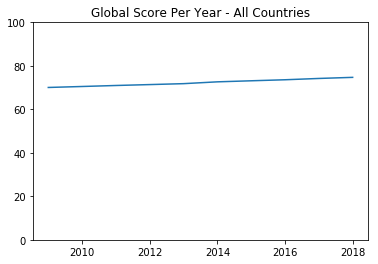

In [628]:
# Getting mean of global score per year from all countries 

global_index_mean = df[['WBL_INDEX','reportyr']].groupby('reportyr').mean()

plt.plot(global_index_mean)
plt.ylim([0,100])
plt.title('Global Score Per Year - All Countries')
print(round(global_index_mean,2))
plt.show()


_Visualization above indicates there has been some progress in the last decade, in terms of laws and regulations to avoid legal gender differentiation around the world._

#### Mean of Global Score Per Year Per Region

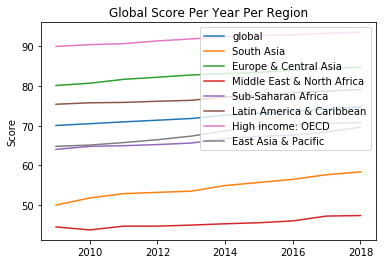

In [629]:
# Getting mean of global score per year per region 
# gipr = global_index_per_region 

plt.plot(global_index_mean)

for r in df.Region.unique():
    gipr = df[df.Region==r][['reportyr','WBL_INDEX']].groupby(['reportyr']).mean()
    gipr.columns
    plt.plot(gipr)

plt.ylabel('Score')
plt.title('Global Score Per Year Per Region')
plt.legend(('global',regions[0],regions[1],regions[2],regions[3],regions[4],regions[5],regions[6]),loc='upper right')


_We can observe in the previous graphic that all regions of the world have had positive changes in laws and regulations regarding the achievement of equality in human legal rights._

#### Comparison of Means of Global Score per Regions (2009 vs 2018)

                             WBL_2009   WBL_2018  diff_decade
Region                                                       
Middle East & North Africa  44.509474  47.371053     2.861579
High income: OECD           89.963750  93.536875     3.573125
Latin America & Caribbean   75.406129  79.095161     3.689032
Europe & Central Asia       80.126800  84.703200     4.576400
East Asia & Pacific         64.801600  70.726400     5.924800
Sub-Saharan Africa          64.037826  69.630638     6.114565
South Asia                  50.002500  58.362500     8.360000


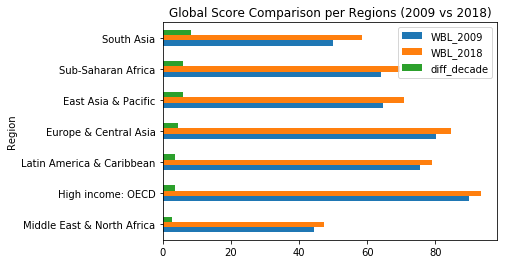

In [631]:
# Function that returns a dataframe with data from a specific year
def create_column(yr,column,new_column):
    lgg_y = df[df.reportyr == yr][['economy','Region',column]]
    lgg_y.rename(columns={column : new_column + '_' + str(yr)},inplace=True)
    return lgg_y


lgg_2009 = create_column(2009,'WBL_INDEX','WBL')
lgg_2018 = create_column(2018,'WBL_INDEX','WBL')

# Creating a new dataframe 
# lgg = legally_gender_gap

lgg = pd.merge(lgg_2009, lgg_2018)
lgg['diff_decade'] = lgg['WBL_2018'] - lgg['WBL_2009']

x = lgg[['Region','WBL_2009','WBL_2018','diff_decade']].groupby('Region').mean().sort_values(by='diff_decade', ascending=True)
x.plot(kind='barh', title='Global Score Comparison per Regions (2009 vs 2018)')

print(x)

_Numbers above indicate that the region with the most significant change is South Asia with 8.36 points of difference between 2009 and 2018. And, the region with less changes in terms of Women's Legal Rights is the Middle East & North Africa Region. Anyway it does not mean those regions have the highest and lowest global scores respectively._

#### Comparison of Means of Global Score per Category (2009 vs 2018)

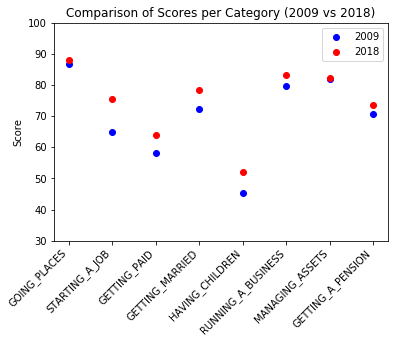

In [632]:
x = df[df.reportyr == 2009][['GOING_PLACES','STARTING_A_JOB','GETTING_PAID','GETTING_MARRIED','HAVING_CHILDREN','RUNNING_A_BUSINESS','MANAGING_ASSETS','GETTING_A_PENSION']].mean()
y = df[df.reportyr == 2018][['GOING_PLACES','STARTING_A_JOB','GETTING_PAID','GETTING_MARRIED','HAVING_CHILDREN','RUNNING_A_BUSINESS','MANAGING_ASSETS','GETTING_A_PENSION']].mean()

plt.plot(x,'o',color='blue',linewidth=2.0)
plt.plot(y,'o',color='red')
plt.ylim([30,100])
plt.ylabel('Score')
plt.title('Comparison of Scores per Category (2009 vs 2018)')
plt.legend(('2009','2018'),loc='upper right')

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()



_Every category measures how regulations and laws affect women throughout their lives. The graphic shows clearly that **Having Children** is the category with lowest score but it has had more changes than **Getting a Pension** or **Going Places** with higher scores in both. Another finding is that **Starting a Job** category is the one that presents more changes, while in the category **Managing Assets** are only some reforms were made over the past 10 years._

#### Summary Statistics of Main Variables

In [633]:
lgg[['WBL_2009','WBL_2018']].describe()

WBL_2009    WBL_2018
count  186.000000  187.000000
mean    70.059570   74.708342
std     17.466457   17.468906
min     23.130000   25.630000
25%     60.630000   65.005000
50%     72.500000   76.880000
75%     83.750000   88.130000
max     97.500000  100.000000

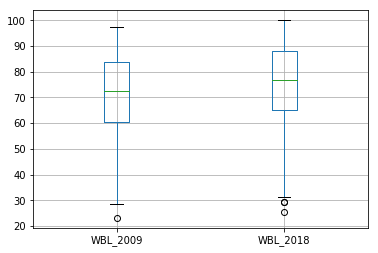

In [634]:
boxplot = lgg.boxplot(column=['WBL_2009','WBL_2018'])

_Again, we can observe in the boxplot above that there has been an improvement in terms of Women's Legal Rights between 2009 and 2018._

#### Let's deep into the dataset and identify those countries with significant, small, null or negative growth in the Global Score indicator, comparing 2009 and 2018

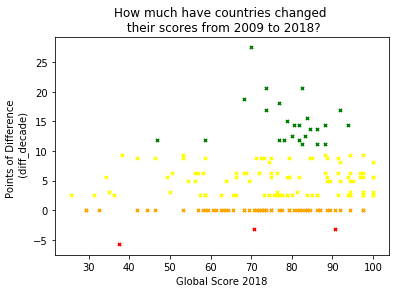

In [652]:
# Countries with significant improvements on laws and regulations
high_impro = lgg[lgg['diff_decade'] >= 11][['Region','economy','WBL_2018','WBL_2009','diff_decade']].sort_values(by=['diff_decade','WBL_2018'], ascending=False)

# Countries with zero or small improvements on laws and regulations
regular_impro = lgg[(lgg['diff_decade'] >= 1) & (lgg['diff_decade'] < 10)][['Region','economy','WBL_2018','WBL_2009','diff_decade']].sort_values(by=['diff_decade','WBL_2018'], ascending=False)

# Countries with no changes in 10 years
no_impro = lgg[(lgg['diff_decade'] == 0)][['Region','economy','WBL_2018','WBL_2009','diff_decade']].sort_values(by=['diff_decade','WBL_2018'], ascending=False)

# Countries with a reduction on the global score
negative_growth = lgg[lgg['diff_decade'] < 0][['Region','economy','WBL_2018','WBL_2009','diff_decade']].sort_values(by=['diff_decade','WBL_2018'], ascending=False)


plt.scatter(
    x=high_impro['WBL_2018'],
    y=high_impro['diff_decade'],
    color='green',
    marker='x', s=10
)
plt.scatter(
    x=regular_impro['WBL_2018'],
    y=regular_impro['diff_decade'],
    color='yellow',
    marker='x', s=10
)

plt.scatter(
    x=no_impro['WBL_2018'],
    y=no_impro['diff_decade'],
    color='orange',
    marker='x', s=10
)

plt.scatter(
    x=negative_growth['WBL_2018'],
    y=negative_growth['diff_decade'],
    color='red',
    marker='x', s=10
)

plt.ylabel('Points of Difference \n (diff_decade)')
plt.xlabel('Global Score 2018')
plt.title('How much have countries changed \n their scores from 2009 to 2018?')
plt.show()

_The graphic above shows in 4 colors, how much countries have changed some of their regulations and laws to close the legal gender gap. As commented before, the data set contains 35 questions to assess the legal gap between women and men. Each question with a YES answer means women and men are treated as the same way; every NO answer means there is a legal distinction between women and men._

Colors means how much progress countries have (or not) had in the last decade:

- Green: Countries that changed answer from NO to YES in more than 4 questions into the dataset
- Yellow: Countries that change the answer from NO to YES in at least 1 up to 4 questions of the dataset
- Orange: Countries with no changes in 10 years
- Red : Countries that changed regulations and laws in a negative way, those changes contribute to open the legal gender gap


Next there are the lists of top 5 countries in each category depicted in the graphic.

In [651]:
high_impro.head(5)  #GREEN Color: Countries with significant improvements on laws and regulations

Region                economy  WBL_2018  WBL_2009  \
37          Sub-Saharan Africa       Congo, Dem. Rep.     70.00     42.50   
19   Latin America & Caribbean                Bolivia     82.50     61.88   
103                 South Asia               Maldives     73.75     53.13   
67          Sub-Saharan Africa                 Guinea     68.13     49.38   
143         Sub-Saharan Africa  São Tomé and Príncipe     76.88     58.75   

     diff_decade  
37         27.50  
19         20.62  
103        20.62  
67         18.75  
143        18.13

In [642]:
regular_impro.head(5)   #YELLOW Color: Countries with some improvements on laws and regulations

Region            economy  WBL_2018  WBL_2009  diff_decade
23     East Asia & Pacific  Brunei Darussalam     53.13     43.75         9.38
0               South Asia        Afghanistan     38.13     28.75         9.38
41   Europe & Central Asia            Croatia     94.38     85.00         9.38
153     Sub-Saharan Africa       South Africa     88.13     78.75         9.38
64       High income: OECD             Greece     97.50     88.13         9.37

In [643]:
no_impro.tail(5)   ##ORANGE: 53 Countries with no changes in 10 years

Region               economy  WBL_2018  WBL_2009  \
126  Middle East & North Africa                  Oman     44.38     44.38   
107          Sub-Saharan Africa            Mauritania     41.88     41.88   
137  Middle East & North Africa                 Qatar     32.50     32.50   
160          Sub-Saharan Africa                 Sudan     29.38     29.38   
177  Middle East & North Africa  United Arab Emirates     29.38     29.38   

     diff_decade  
126          0.0  
107          0.0  
137          0.0  
160          0.0  
177          0.0

In [644]:
negative_growth   ##RED: Countries with a reduction on the global score

Region     economy  WBL_2018  WBL_2009  diff_decade
151           High income: OECD    Slovenia     90.63     93.75        -3.12
181       Europe & Central Asia  Uzbekistan     70.63     73.75        -3.12
11   Middle East & North Africa     Bahrain     37.50     43.13        -5.63

### Top 15 of countries with the highest scores for Women’s Legal Rights

In [655]:
#Countries with the highest scores
highest = lgg[lgg.WBL_2018 >= 97][['economy','WBL_2018','diff_decade','Region']].sort_values(by='WBL_2018',ascending=False)
highest.head(15)

economy  WBL_2018  diff_decade                 Region
15          Belgium     100.0         5.62      High income: OECD
44          Denmark     100.0         2.50      High income: OECD
58           France     100.0         8.12      High income: OECD
93           Latvia     100.0         2.50  Europe & Central Asia
99       Luxembourg     100.0         5.62      High income: OECD
162          Sweden     100.0         3.12      High income: OECD
8           Austria      97.5         3.12      High income: OECD
30           Canada      97.5         0.00      High income: OECD
53          Estonia      97.5         6.25      High income: OECD
57          Finland      97.5         3.12      High income: OECD
64           Greece      97.5         9.37      High income: OECD
79          Ireland      97.5         2.50      High income: OECD
135        Portugal      97.5         2.50      High income: OECD
155           Spain      97.5         0.00      High income: OECD
178  United Kingdom      97.5         5.62      High income: OECD

### Top 15 of countries with the lowest scores for Women’s Legal Rights

In [656]:
#Countries with the lowest scores
lowest = lgg[lgg.WBL_2018 <= 46][['economy','WBL_2018','diff_decade','Region']].sort_values(by='WBL_2018',ascending=True)
lowest.head(15)

economy  WBL_2018  diff_decade                      Region
144          Saudi Arabia     25.63         2.50  Middle East & North Africa
160                 Sudan     29.38         0.00          Sub-Saharan Africa
177  United Arab Emirates     29.38         0.00  Middle East & North Africa
77     Iran, Islamic Rep.     31.25         2.50  Middle East & North Africa
137                 Qatar     32.50         0.00  Middle East & North Africa
164  Syrian Arab Republic     34.38         5.63  Middle East & North Africa
84                 Jordan     35.00         3.12  Middle East & North Africa
90                 Kuwait     35.00         3.12  Middle East & North Africa
68          Guinea-Bissau     36.25         2.50          Sub-Saharan Africa
11                Bahrain     37.50        -5.63  Middle East & North Africa
0             Afghanistan     38.13         9.38                  South Asia
78                   Iraq     41.88         8.75  Middle East & North Africa
107            Mauritania     41.88         0.00          Sub-Saharan Africa
126                  Oman     44.38         0.00  Middle East & North Africa
154           South Sudan     45.63          NaN          Sub-Saharan Africa

#### Is there any indicator (question) that keep same number since 2009?

In [657]:
questions = list(df.columns[7:11]) + list(df.columns[12:16]) + list(df.columns[17:21]) + list(df.columns[22:27]) + list(df.columns[28:33]) + list(df.columns[34:38]) + list(df.columns[39:44]) + list(df.columns[45:49])

questions_nochange = []
for q in questions:
    x = df[(df[q] == 'Yes') & (df.reportyr == 2009)][[q]].count()
    y = df[(df[q] == 'Yes') & (df.reportyr == 2018)][[q]].count()
    
    if (x[0] == y[0]):
        questions_nochange.append(q)

for q_nochange in questions_nochange:
    print(q_nochange)

Can_a_woman_legally_travel_outside_her_home_in_the_same_way_as_a_man?
Does_the_law_provide_for_the_valuation_of_nonmonetary_contributions?


_Yes, there are 2 questions which answers have not beeing changed at all in the last 10 years_

### Answering Questions

- Has there been any progress in Women Legal Rights since 2009? 

   _Yes_
   
   
- How much progress have countries had in the last decade? 

   _In the last decade, the average global score increased from 70.06 to 74.71 (100 is the maximum score)_
   

- What is the region with the most significant changes on laws and regulations? 

   _South Asia_
   
   
- What is the region with minimum changes on laws and regulations? 

   _Middle East & North Africa_
   
   
- What is the category with the most significant changes on laws and regulations? 

   _Starting a Job_
   

- What is the category with minimum changes on laws and regulations? 

   _Managing Assets_
   

- What is the top 15 of countries with the highest scores on Women’s Legal Rights? 

   _Belgium, Denmark, France, Latvia, Luxembourg, Sweden, Austria, Canada, Estonia, Finland, Greece, Ireland, Portugal, Spain and United Kingdom._
   

- What is the top 15 of countries with the lowest scores on Women’s Legal Rights?

   _Saudi Arabia, Sudan,	United Arab Emirates,	Iran, Islamic Republic,	Qatar,	Syrian Arab Republic,	Jordan,	Kuwait,	Guinea-Bissau,	Bahrain,	Afghanistan,	Iraq,	Mauritania,	Oman and South Sudan._



- Is there any indicator (question) with no changes since 2009?

   _Yes, there are two questions: Can a woman legally travel outside her home in the same way as a man? and Does the law provide for the valuation of nonmonetary contributions? with no changes since 2009._

### Conclusions

It is true there has been some progress in the last 9 years trying to close the legal gender gap around the world but it is also true that the gap is still there, in most of the countries.

Important findings:

- Only 6 of 187 countries, women and men are legally treated equally
- Just the 3% of the countries have laws or regulations for human beings, no matter the gender 
- 97% of the countries still have a legal gender gap, small and huge gaps. The legal gender gap must disappear
- The lowest score found was 25.63. It is evident there are a lot of work to do it to close the gap

Further Reserach: _Using same dataset, can I predict the year when legal gender gap disappear in every category, in every country, in all the regions?_

**There is not a single reason to grant any kind of privileges to someone just because it was born as a girl or as a boy.** 


<font color=gray><small>By: Wendy Navarrete <br>
April 30th, 2019</small></font>